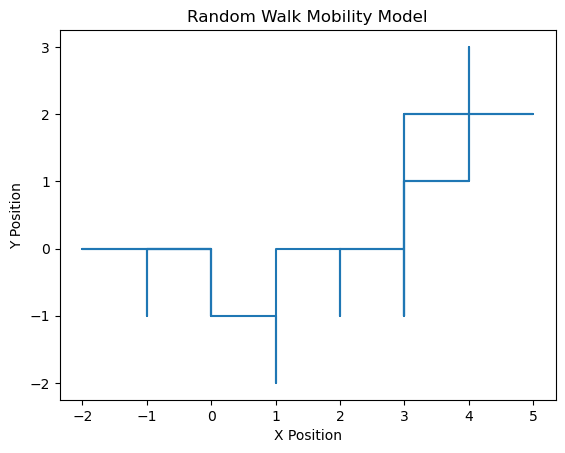

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_steps = 40
initial_position = np.array([0, 0])
step_size = 1

# Initialize position
position = initial_position
x = [position[0]]
y = [position[1]]

# Define four possible directions
directions = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])

# Simulate random walk
for i in range(num_steps):
    direction = np.random.randint(0, 4)
    position = position + step_size * directions[direction]
    x.append(position[0])
    y.append(position[1])

# Plot results
plt.plot(x, y)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Random Walk Mobility Model')
plt.show()